In [ ]:
"""Ejercicio 1
La base de datos MNIST contiene imágenes de 28×28, en escala de grises, de números escritos a mano.
Está conformada por 60.000 ejemplos de entrenamiento y 10.000 ejemplos de prueba.


a) Con el conjunto de 60000 imágenes entrene una red neuronal convolucional para predecir el dígito
presente en la imagen. Recuerde normalizar los valores de cada imagen. Salve el modelo para
recuperarlo después.
b) Levante el modelo guardado en el punto a) y utilice la clase DrawPanel del módulo utils.images de
la carpeta fuentes para generar un dibujo escrito a mano de un dígito y predecir la clase a la que
pertenece

"""

In [ ]:
!pip install livelossplot --quiet

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(28, 28) 10


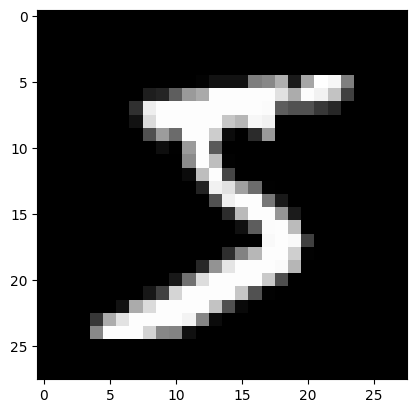

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn import metrics
import seaborn as sns

import  matplotlib.pyplot as plt
import numpy as np

#Me traigo el dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #acá estamos cargando la información

#Lo paso a categorico
Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))


#Imprimo la primer imagen
IMG_SHAPE = X_train[0].shape
TARGET_CNT= len(Y_train[0])

print(IMG_SHAPE, TARGET_CNT)
plt.imshow(X_train[0, :,:], cmap='gray')

# normalización para tener datos entre 0 y 1
X_train = X_train / 255
X_test  = X_test  / 255



In [ ]:
#digo de qué forma voy a especificar las capas y neuronas
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu', input_shape=[*IMG_SHAPE, 1] ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='leaky_relu'))
model.add(Dense(TARGET_CNT, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 13, 13, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,078 (176.09 KB)

 Trainable params: 45,078 (176.09 KB)

 Non-trainable params: 0 (0.00 B)

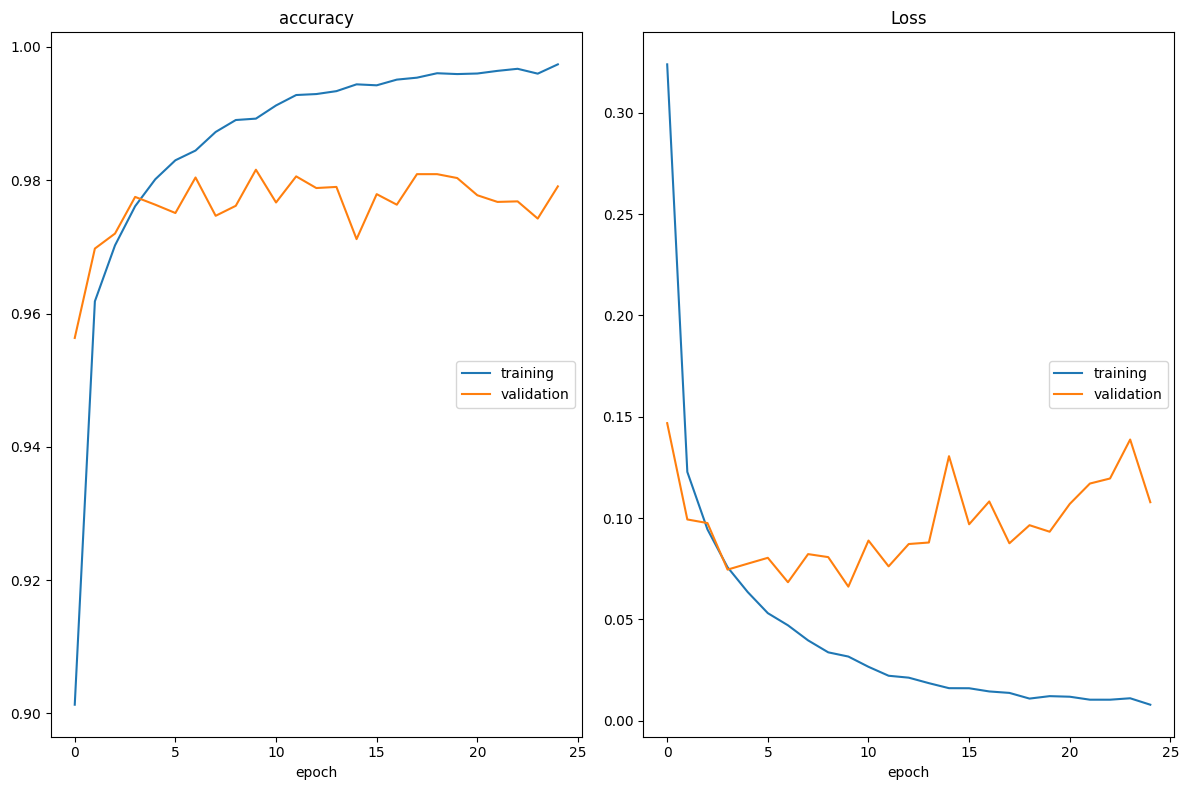

accuracy
	training         	 (min:    0.901, max:    0.997, cur:    0.997)
	validation       	 (min:    0.956, max:    0.982, cur:    0.979)
Loss
	training         	 (min:    0.008, max:    0.324, cur:    0.008)
	validation       	 (min:    0.066, max:    0.147, cur:    0.108)
(60000, 28, 28)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step

Efectividad del modelo con datos de entrenamiento:  99.50%
Efectividad del modelo con datos de Prueba.......:  97.98%


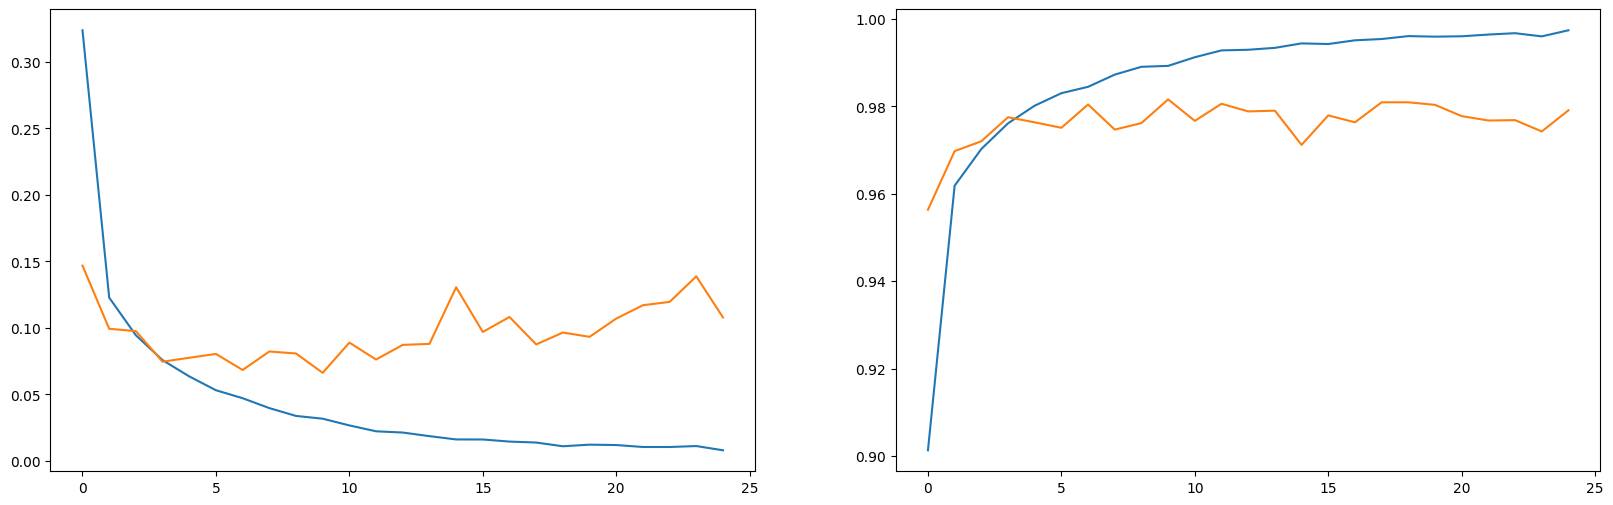

<Figure size 640x480 with 0 Axes>

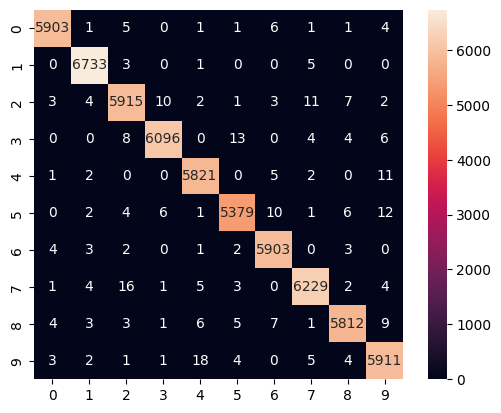

In [ ]:
LOTES  = 32
EPOCAS = 25

from livelossplot import PlotLossesKeras

H = model.fit(x=X_train, y=Y_train, batch_size=LOTES,
              epochs=EPOCAS, validation_split=0.2, callbacks=[PlotLossesKeras()], verbose=0)


# hago gráfico
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")
axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")


print (X_train.shape)
pred = model.predict(X_train)

cm = metrics.confusion_matrix(np.argmax(Y_train, axis=1), np.argmax(pred, axis=1))
plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')


# %% evalua el modelo para entrenamiento y testeo
pred = model.evaluate(X_train, Y_train, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de validacion
pred = model.evaluate(X_test, Y_test, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Ejercicio1_model.h5')

Mounted at /content/drive


In [ ]:
import sys

# Agregar la ruta de la carpeta que contiene ClassDrawPanel.py
sys.path.append('/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Fuentes/ClassDrawPanel.py')

from ClassDrawPanel import DrawPanel


from sklearn import metrics
import seaborn as sns

import  matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

model = load_model('/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Ejercicio1_model.h5')
dp = DrawPanel()
image = dp.draw(size=IMG_SHAPE, line_width=2.0, scale = 5)

#normaliza
gs_image = np.array(image)[:,:,3]/255 #la img es RGBA, entonces elijo la matriz A (de transparencia) para procesar la img

gs_image = gs_image.reshape(1,*IMG_SHAPE,1)#indico tamaño del lote, tamaño de la img e indico que hay 1 canalde grises nomás

resp = model.predict(gs_image, verbose=0)#predecimos

digito = np.argmax(resp) #nos fijamos la rta

print("El trazo dibujado corresponde al dígito %d" % digito)

El trazo dibujado corresponde al dígito 7


In [ ]:
"""


Ejercicio 2
Se buscará resolver la clasificación de los dígitos de MNIST usando la siguiente configuración:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(F, kernel_size=K, strides=(S,S), activation=FUN))
model.add(MaxPooling2D(pool_size=(2,2))) # -- opcional --
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()
donde F es la cantidad de filtros o de mapas de características, K es el tamaño del kernel o máscara, S es el
valor del stride y FUN es la función de activación de la capa de convolución.
La tabla que aparece a continuación sugiere los valores a utilizar. Se recomienda emplear Parada
Temprana para reducir el tiempo de entrenamiento. Para ello utilice
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)
Esto indica que, si el valor del accuracy sobre los datos de validación no mejora después de 5 épocas, el
entrenamiento finaliza. Puede usarse el parámetro min_delta para indicar cuando la diferencia entre dos
accuracy se considerará significativa. Luego agregue este objeto en el momento del entrenamiento por
medio del párametro callbacks
 H = model.fit(x = X_train, y = Y_train, batch_size = LOTES,
validation_data = (X_test, Y_test), epochs=4000, callbacks=[es])


"""

(28, 28) 10


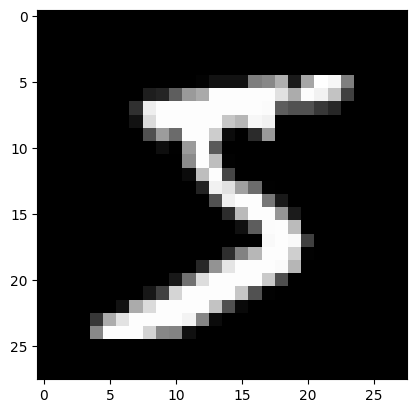

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn import metrics
import seaborn as sns

import  matplotlib.pyplot as plt
import numpy as np

#Me traigo el dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #acá estamos cargando la información

#Lo paso a categorico
Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))


#Imprimo la primer imagen
IMG_SHAPE = X_train[0].shape
TARGET_CNT= len(Y_train[0])

print(IMG_SHAPE, TARGET_CNT)
plt.imshow(X_train[0, :,:], cmap='gray')

# normalización para tener datos entre 0 y 1
X_train = X_train / 255
X_test  = X_test  / 255


In [ ]:
F = 4#cantidad de filtros -> cantidad de matrices de conversión que usa
K = 3#tamaño del kernel -> tamaño de los filtros cuadrados, si dice 3 entonces será de 3x3
S = 1#valor del stride -> cuántos píxeles se desplaza en cada paso
#FUN = "sigmoid"#función de activación de la capa de convolución
FUN ="relu"
#FUN = "tanh"

model = Sequential() #digo de qué forma voy a especificar las capas y neuronas

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(F, kernel_size=K, strides=(S,S), activation=FUN))
model.add(MaxPooling2D(pool_size=(2,2))) #capa opcional para achicar las imágenes resultantes, donde se queda con el max pixel de cada 4
model.add(Flatten())
model.add(Dense(10,activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 4)           │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 676)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           6,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,810 (26.60 KB)

 Trainable params: 6,810 (26.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8207 - loss: 0.6162 - val_accuracy: 0.9156 - val_loss: 0.2859
Epoch 2/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9131 - loss: 0.2976 - val_accuracy: 0.9249 - val_loss: 0.2605
Epoch 3/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9198 - loss: 0.2720 - val_accuracy: 0.9302 - val_loss: 0.2353
Epoch 4/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9322 - loss: 0.2348 - val_accuracy: 0.9429 - val_loss: 0.1928
Epoch 5/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9461 - loss: 0.1895 - val_accuracy: 0.9558 - val_loss: 0.1489
Epoch 6/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9582 - loss: 0.1449 - val_accuracy: 0.9637 - val_loss: 0.1200
Epoch 7/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9669 - loss: 0.1128 - val_accuracy: 0.9714 - val_loss: 0.0937
Epoch 8/4000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy:

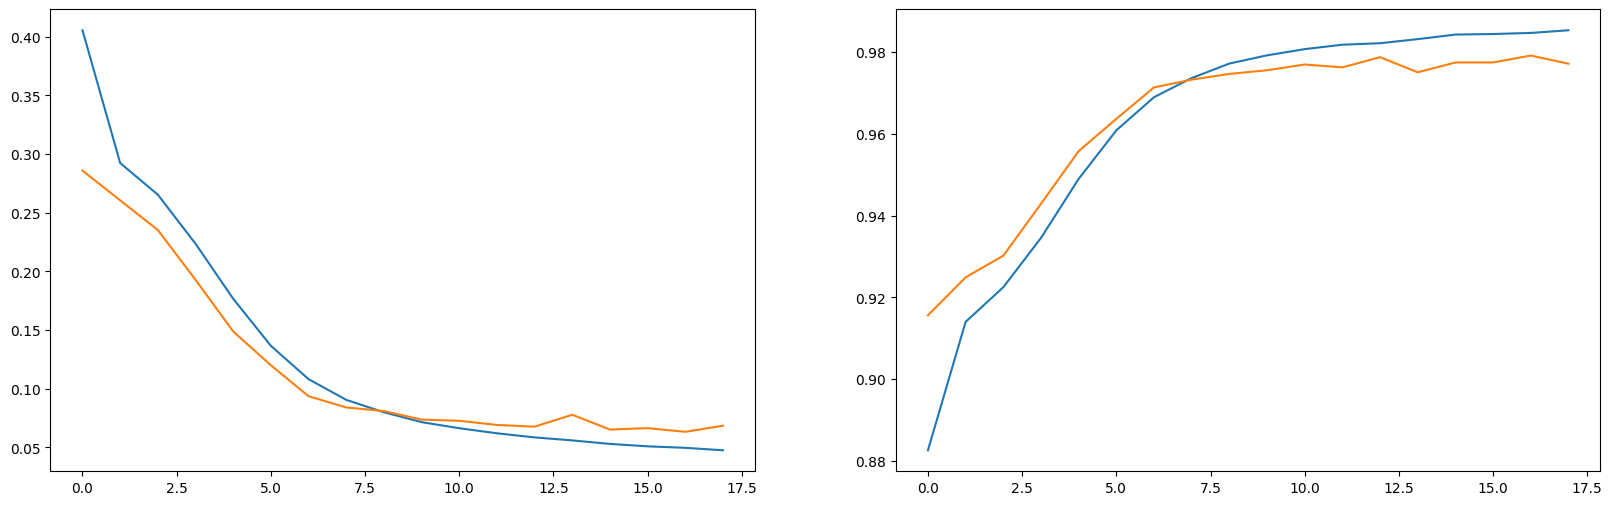

<Figure size 640x480 with 0 Axes>

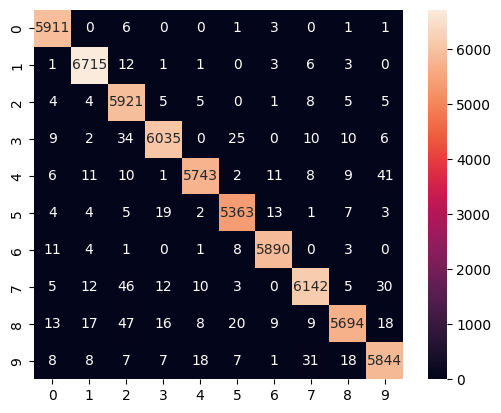

In [ ]:
LOTES  = 32
EPOCAS = 25

from livelossplot import PlotLossesKeras
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

H = model.fit(x = X_train, y = Y_train, batch_size = LOTES, validation_data = (X_test, Y_test), epochs=4000, callbacks=[es])

# hago gráfico
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")
axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")


print (X_train.shape)
pred = model.predict(X_train)

cm = metrics.confusion_matrix(np.argmax(Y_train, axis=1), np.argmax(pred, axis=1))
plt.figure()
sns.heatmap(cm, square=True,  annot=True, fmt='d')


# %% evalua el modelo para entrenamiento y testeo
pred = model.evaluate(X_train, Y_train, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de validacion
pred = model.evaluate(X_test, Y_test, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))

| Cant. de filtros | Tamaño del kernel o filtro | Stride | Función de activación | Max Pooling con filtro de tamaño 2x2 y stride=2 | Total de parámetros | Épocas | Accuracy en Train | Accuracy en Test |
|------------------|---------------------------|--------|----------------------|--------------------------------------------------|---------------------|--------|-------------------|------------------|
| 4                | 3x3                       | 1      | ReLU                 | Sí                                               | 6810                | 19     | 98.56             | 97.49            |
| 16               | 3x3                       | 1      | ReLU                 | Sí                                               | 27210               | 11     | 99.27             | 98.19            |
| 64               | 3x3                       | 1      | ReLU                 | Sí                                               | 108810              | 12     | 99.90             | 98.48            |
| 4                | 7x7                       | 1      | ReLU                 | Sí                                               | 5050                | 13     | 98.85             | 98.08            |
| 16               | 7x7                       | 1      | ReLU                 | Sí                                               | 20170               | 14     | 99.77             | 98.78            |
| 64               | 7x7                       | 1      | ReLU                 | Sí                                               | 80650               | 9      | 99.69             | 98.77            |
| 64               | 3x3                       | 1      | ReLU                 | No                                               | 433290              | 11     | 99.86             | 98.13            |
| 64               | 3x3                       | 2      | ReLU                 | No                                               | 108810              | 11     | 99.63             | 97.84            |
| 64               | 3x3                       | 3      | ReLU                 | No                                               | 52490               | 12     | 98.86             | 97.39            |
| 64               | 3x3                       | 1      | TanH                 | Sí                                               | 108810              | 10     | 99.34             | 97.67            |
| 64               | 3x3                       | 1      | Sigmoide             | Sí                                               | 108810              | 22     | 99.20             | 97.99            |


Conclusiones
Usar relu acelera el proceso por tener una derivada sencilla de calcular

Usar pooling no afecta practicamente en los resultados y nos permite hacer más rápido el entrenamiento

No es necesario una gran cantidad de filtros ni de matriz para poder resolver este problema


In [ ]:
"""
Ejercicio 3
Para resolver este ejercicio utilice un modelo de red neuronal convolucional que reconozca la cantidad de
dedos extendidos en cada mano de las imágenes que conforman el juego de datos “Fingers”.

La versión original de este de estas imágenes se encuentra en https://www.kaggle.com/koryakinp/fingers.
Puede hallar una versión reducida de estas imágenes en el Moodle del curso, en la misma sección donde se
encuentra este enunciado de práctica. También encontrará allí ejemplos sobre cómo cargar estas imágenes
y cómo procesarlas con una red neuronal convolucional.
a) Entrene y pruebe un modelo utilizando los datos de las carpetas test y train, midiendo accuracy
b) Genere una versión del dataset para test agregando transformaciones al azar sobres imágenes
originales. Haga rotaciones entre -45 y 45 grados, repita el test y mida el accuracy.
c) Genere una versión del dataset train como la realizada en b) y repita entrenamiento y prueba de a)
con los datasets de modificados.


Preparación de Dataset

Para poder trabajar con el dataset se debe:

Copiar los archivos Espectros.7z.001, Espectros.7z.002 y Espectros.7z.003 en la carpeta drive de los datos (establecida para este script en DATOS_DIR).
Descomprimir con 7zip los archivos

"""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!apt-get install p7zip-full
# Los archivos Fingers.7z.001, Fingers.7z.002 y Fingers.7z.003 deben estar en la carpeta
# para descomprimir las imagenes con el compresor 7zip
!7z x "/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/Dedos/Fingers.7z.001" -o"/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/Dedos"


Output hidden; open in https://colab.research.google.com to view.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cargando imágenes: 100.00%%

Cargando imágenes: 100.00%%



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,050,374 (4.01 MB)

 Trainable params: 1,050,374 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4022 - loss: 1.5586 - val_accuracy: 0.7778 - val_loss: 0.9416
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8259 - loss: 0.8522 - val_accuracy: 0.8642 - val_loss: 0.6362
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8928 - loss: 0.5902 - val_accuracy: 0.9339 - val_loss: 0.4689
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9209 - loss: 0.4622 - val_accuracy: 0.9453 - val_loss: 0.3827
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9345 - loss: 0.3805 - val_accuracy: 0.9514 - val_loss: 0.3269
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9467 - loss: 0.3231 - val_accuracy: 0.9533 - val_loss: 0.2906
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9491 - loss: 0.2851 - val_accuracy: 0.9556 - val_loss: 0.2562
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9552 - loss: 0.2581 - val_accu

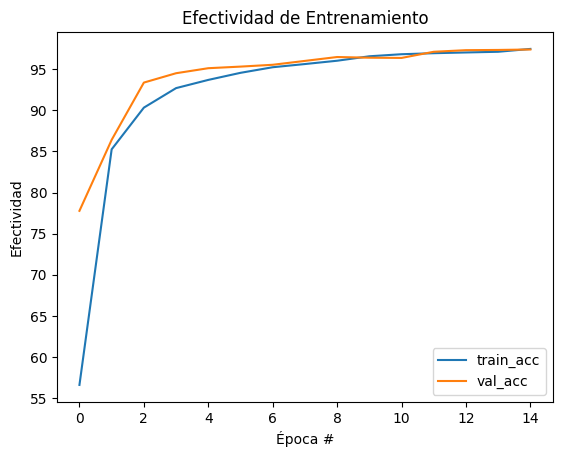

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import glob
from skimage import io

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

IMG_SIZE = (64, 64)

def import_data(img_list):
    img_data = []
    label_data = []

    img_count = len(img_list)
    for i in range(0,img_count):
        img = img_list[i]
        img_read = io.imread(img)
        img_read = img_read/img_read.max() # normaliza pixeles entre 0 y 1
        img_data.append(img_read)          # agrega a lista de imágenes a procesar
        label_data.append(img[-6])         # extrae cant. dedos del nombre del archivo
        # muestra progreso en la carga
        if i % 100 == 0:
            print("\rCargando imágenes: %6.2f%%" % (100*i/img_count), end="")
    print("\rCargando imágenes: 100.00%%\n")

    return np.array(img_data), np.array(label_data)


def build_model():
    model = Sequential()

    model.add(Input(shape=IMG_SIZE))
    model.add(Flatten())
    model.add(Dense(256, activation = 'tanh'))
    #model.add(Dense(32, activation = 'tanh'))
    model.add(Dropout(0.30))
    model.add(Dense(6, activation = 'softmax'))

    model.summary()
    return model


#Punto C
import numpy as np
from random import random
from PIL import Image

def rotar_al_azar(data_imgs, max_ang):
    result = np.zeros_like(data_imgs)
    for i, img in enumerate(data_imgs):
        # Convertir el array a una imagen PIL
        pil_img = Image.fromarray(np.uint8(img * 255))  # Suponiendo que las imágenes están normalizadas a [0, 1]
        ang = (random() - 0.5) * max_ang
        # Rotar la imagen
        rotated_img = pil_img.rotate(ang)
        # Convertir la imagen rotada de nuevo a un array
        result[i] = np.array(rotated_img) / 255.0  # Normalizar de nuevo si es necesario

    return result
#Fin Punto C






EPOCAS = 15
LOTES  = 128

# lista de archivos a procesar
train_img_list = glob.glob("/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/Dedos/train/**/*.png", recursive=True)
test_img_list = glob.glob("/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/Dedos/test/**/*.png", recursive=True)



# carga las imagenes a partir de los nombres de archivos
xtrain, ytrain = import_data(train_img_list)

# conviertes el id de la clase en "one hot encoding": 3 => [0,0,0,1,0,0]
ytrain = to_categorical(ytrain, num_classes = 6)

# separa los datos y clase en grupo de entrenamiento y validacion
x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size = 0.20, random_state = 7, shuffle = True)


# carga las imagenes a partir de los nombres de archivos
xtest, ytest = import_data(test_img_list)

# conviertes el id de la clase en "one hot encoding": 3 => [0,0,0,1,0,0]
ytest = to_categorical(ytest, num_classes = 6)


#Rota (Punto C)
xtest = rotar_al_azar(xtest, 45)
x_train = rotar_al_azar(x_train, 45)
x_val = rotar_al_azar(x_val, 45)




# obtiene la arquitectura para el modelo y lo compila
model = build_model()
model.compile('SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])


# entrena el modelo y guarda la historira del progreso
H = model.fit(x = x_train, y = y_train, batch_size = LOTES, epochs = EPOCAS, validation_data = (x_val, y_val))

# dibuja accuracy del progreso del entrenamiento
N = np.arange(0, EPOCAS)
accuracy = np.array(H.history["accuracy"])
val_accuracy = np.array(H.history["val_accuracy"])

plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_acc")
plt.plot(N, 100*val_accuracy, label="val_acc")
plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Efectividad")
plt.legend(loc="lower right")


# evalua el modelo con los datos de validacion
pred = model.evaluate(x_val, y_val, batch_size = LOTES)

print("\nEfectividad del modelo con datos de validación: %6.2f%%" % (pred[1]*100))






In [ ]:
#PuntoB

import numpy as np
from random import random
from PIL import Image

def rotar_al_azar(data_imgs, max_ang):
    result = np.zeros_like(data_imgs)
    for i, img in enumerate(data_imgs):
        # Convertir el array a una imagen PIL
        pil_img = Image.fromarray(np.uint8(img * 255))  # Suponiendo que las imágenes están normalizadas a [0, 1]
        ang = (random() - 0.5) * max_ang
        # Rotar la imagen
        rotated_img = pil_img.rotate(ang)
        # Convertir la imagen rotada de nuevo a un array
        result[i] = np.array(rotated_img) / 255.0  # Normalizar de nuevo si es necesario

    return result

# Suponiendo que xtest es un array de imágenes
xtest_rot = rotar_al_azar(xtest, 45)

# Evalúa el modelo con los datos de testeo
pred = model.evaluate(xtest_rot, ytest, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1] * 100))

Efectividad del modelo con datos de Prueba.......:  78.28%


In [ ]:
"""
Ejercicio 4
Resuelva el punto c) del ejercicio anterior con las imágenes originales de las carpetas train y test y utilice:
▪ el objeto ImageDataGenerator del módulo tensorflow.keras.preprocessing.image para generar
de forma automática una versión aumentada de los datos con las características del punto b).
▪ el método flow_from_file del objeto ImageDataGenerator para utilizar directamente las imágenes
de las carpetas en vez de cargarlas en memoria.

"""

In [ ]:
"""Implementacion companero"""


from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# constantes para arquitectura, generación datos y entrenamiento/validacion
EPOCAS = 30
LOTES  = 32
IMG_SIZE = (64, 64, 1)
N_CLASSES = 6
PACIENCIA = 10

# %% construye le modelo

def build_model(img_size, classes):
    model = Sequential()

    model.add(InputLayer(input_shape=img_size))
    model.add(Conv2D(8, kernel_size=(3,3), strides=(2,2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(10, activation = 'tanh'))
    model.add(Dense(classes, activation = 'softmax'))

    model.summary()
    return model

# obtiene la arquitectura para el modelo y lo compila
model = build_model(IMG_SIZE, N_CLASSES)
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


# %% Entrenamiento del modelo

# construye un generador de imagenes para dividir en entrenamiento y validación
# aplicando transformaciones para aumentar los datos
data_train_generator = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=45,         # rotacion
    # zoom_range=0.15,         # zoom
    # width_shift_range=0.1,   # desplazamiento horizontal
    # height_shift_range=0.1,  # desplazamiento vertical
    # shear_range=0.15,        #
    # horizontal_flip=False,   # espejo horizontal
    #vertical_flip=False,      # espejo vertical
    fill_mode="nearest"
    )

# generador para entrenamiento a partir de la carpeta indicada en IMAGES_DIR
train_iter = data_train_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory='/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/Dedos/train',
            class_mode='categorical',
            batch_size=LOTES,
            color_mode='grayscale',
            subset='training'   # asigna subconjunto segun validation_split del ImageDataGenerator
            )

valid_iter = data_train_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory='/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/Dedos/train',
            class_mode='categorical',
            batch_size=LOTES,
            color_mode='grayscale',
            subset='validation' # asigna subconjunto segun validation_split del ImageDataGenerator
            )


data_test_generator = ImageDataGenerator(
    rotation_range=45,         # rotacion
    # zoom_range=0.15,         # zoom
    # width_shift_range=0.1,   # desplazamiento horizontal
    # height_shift_range=0.1,  # desplazamiento vertical
    # shear_range=0.15,        #
    # horizontal_flip=False,   # espejo horizontal
    #vertical_flip=False,      # espejo vertical
    fill_mode="nearest"
    )

test_iter = data_test_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory='/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/Dedos/test',
            class_mode='categorical',
            color_mode='grayscale',
            batch_size=LOTES
            )

# Callback para parada temprana
early_stop = EarlyStopping(monitor='val_loss',
                           patience=PACIENCIA,
                           restore_best_weights=True)

H = model.fit(
    train_iter,
    validation_data=valid_iter,
    validation_steps= 10,
    epochs=EPOCAS,
    callbacks=[early_stop])

# dibuja accuracy del progreso del entrenamiento
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")

# %% evalua el modelo para entrenamiento
pred = model.evaluate(train_iter, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de testeo
pred = model.evaluate(valid_iter, verbose=0)
print("Efectividad del modelo con datos de Validación...: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de testeo
pred = model.evaluate(test_iter, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 31, 31, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 144)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

Found 14400 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


450/450 ━━━━━━━━━━━━━━━━━━━━ 2658s 6s/step - accuracy: 0.1585 - loss: 1.8726 - val_accuracy: 0.1969 - val_loss: 1.7665
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 107s 236ms/step - accuracy: 0.2527 - loss: 1.7223 - val_accuracy: 0.3187 - val_loss: 1.5528
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 96s 211ms/step - accuracy: 0.3201 - loss: 1.5540 - val_accuracy: 0.3562 - val_loss: 1.4580
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 75s 164ms/step - accuracy: 0.4142 - loss: 1.3665 - val_accuracy: 0.6781 - val_loss: 1.0040
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 67s 146ms/step - accuracy: 0.7018 - loss: 0.9050 - val_accuracy: 0.7625 - val_loss: 0.7508
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 81s 144ms/step - accuracy: 0.7648 - loss: 0.6817 - val_accuracy: 0.8000 - val_loss: 0.5780
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 83s 146ms/step - accuracy: 0.7787 - loss: 0.5675 - val_accuracy: 0.7594 - val_loss: 0.4942
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 66s 144ms/step - accuracy: 0.8310 - loss: 0.4804 - val

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


450/450 ━━━━━━━━━━━━━━━━━━━━ 71s 157ms/step - accuracy: 0.9523 - loss: 0.2210 - val_accuracy: 0.9750 - val_loss: 0.1338
Epoch 13/30


In [2]:
"""


Ejercicio 5

“Flowers” es un juego de datos compuesto por 16 categorías de flores con unas 1000 imágenes de RGB de
256 x 256 píxeles disponible en Kaggle en el enlace https://www.kaggle.com/datasets/l3llff/flowers.
En la carpeta de datos del Moodle del curso hay una versión reducida de 96 x 96 píxeles. Utilice este dataset
para entrenar varios modelos de redes convolucionales que permitan clasificar las 16 flores según las
especificaciones que siguen a continuación.


Para cada modelo a entrenar contabilice la cantidad de épocas, accuracy y tiempo promedio por época
(utilice la clase EpochTiming definida en el paquete tf_utils de la carpeta Fuentes como callback para el
entrenamiento). Utilice 250 épocas para los entrenamientos y agregue una parada temprana para evitar
overfitting.
a) Entrene un modelo que utilice solamente capas Conv2D, MaxPooling2D, Flatten y Dense.
b) Modifique la arquitectura anterior agregando capas de BatchNormalization luego las capas de
MaxPooling2D y entrene un nuevo modelo.
c) Compare las mediciones de los entrenamientos de los modelos de a) y b ¿Qué puede concluir? ¿Por
qué?

"""

'\n\n\nEjercicio 5\n\n“Flowers” es un juego de datos compuesto por 16 categorías de flores con unas 1000 imágenes de RGB de\n256 x 256 píxeles disponible en Kaggle en el enlace https://www.kaggle.com/datasets/l3llff/flowers.\nEn la carpeta de datos del Moodle del curso hay una versión reducida de 96 x 96 píxeles. Utilice este dataset\npara entrenar varios modelos de redes convolucionales que permitan clasificar las 16 flores según las\nespecificaciones que siguen a continuación.\n\n\nPara cada modelo a entrenar contabilice la cantidad de épocas, accuracy y tiempo promedio por época\n(utilice la clase EpochTiming definida en el paquete tf_utils de la carpeta Fuentes como callback para el\nentrenamiento). Utilice 250 épocas para los entrenamientos y agregue una parada temprana para evitar\noverfitting.\na) Entrene un modelo que utilice solamente capas Conv2D, MaxPooling2D, Flatten y Dense.\nb) Modifique la arquitectura anterior agregando capas de BatchNormalization luego las capas de\nMa

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
#from ClassEpochTiming import EpochTiming


# constantes para arquitectura, generación datos y entrenamiento/validacion
IMG_SIZE = (96, 96, 3)  # tamaño de la imagen de entrada
N_CLASSES = 16          # cantidad de clases a identificar
LOTES = 128             # tamaño de lotes para entrenamiento y testeo
ALFA = 0.01             # tasa de entrenamiento
EPOCAS = 1000           # cantidad de epocas a entrenar como máximo
PACIENCIA = 10          # parámetro para parada temprana
SEP_TRAIN_TEST = 0.2    # división en entrenamiento y validación


IMAGES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/FlowersX16/'

# construye un generador de imagenes para dividir en entrenamiento y validación
data_generator = ImageDataGenerator(
    validation_split=SEP_TRAIN_TEST,
    rescale= 1.0/255,
    zoom_range=0.15,  # (0.8,1.0),         # zoom
    width_shift_range=0.2,   # desplazamiento horizontal
    height_shift_range=0.2,  # desplazamiento vertical
    horizontal_flip=True,   # espejo horizontal
    brightness_range=(0.8, 1.2) # brillo
)

# generador para entrenamiento a partir de la carpeta indicada en IMAGES_DIR
train_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR,
            class_mode='categorical',
            batch_size=LOTES,
            subset='training'   # asigna subconjunto segun validation_split del ImageDataGenerator
            )

valid_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR,
            class_mode='categorical',
            batch_size=LOTES,
            subset='validation' # asigna subconjunto segun validation_split del ImageDataGenerator
            )




from tensorflow.keras.layers import LeakyReLU
ACTIVATION = LeakyReLU()

# %% construye le modelo
def build_model(img_size, classes):

    model = Sequential()

    model.add(Conv2D(8, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION, input_shape=img_size))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(BatchNormalization())
    model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(100, activation = LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(100, activation = LeakyReLU()))
    model.add(BatchNormalization())
    model.add(Dense(classes, activation = 'softmax'))

    model.summary()
    return model


# %% construye le modelo
# obtiene la arquitectura para el modelo y lo compila
model = build_model(IMG_SIZE, N_CLASSES)
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#model.compile('RMSProp', loss = 'categorical_crossentropy', metrics = ['accuracy'])




# %% Entrenamiento del modelo

# Callback para parada temprana
early_stop = EarlyStopping(monitor='val_loss',
                           patience=PACIENCIA,
                           restore_best_weights=True)

#epoch_timing = EpochTiming()

H = model.fit(
    train_iter,
    validation_data=valid_iter,
    validation_steps= 8,
    epochs=EPOCAS,
    callbacks=[early_stop])
    #callbacks=[early_stop, epoch_timing])

# dibuja accuracy del progreso del entrenamiento
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")



#print('Tiempo promedio por época %.2f segundos' % epoch_timing.avg_epoch_time)
model.evaluate(train_iter)
model.evaluate(valid_iter)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import mixed_precision

# Habilitar mixed precision
mixed_precision.set_global_policy('mixed_float16')

# Tamaños y constantes
IMG_SIZE = (96, 96, 3)
N_CLASSES = 16
LOTES = 128
EPOCAS = 1000
PACIENCIA = 10
SEP_TRAIN_TEST = 0.2

# Directorio de imágenes
IMAGES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/FlowersX16/'

# Generador de imágenes
data_generator = ImageDataGenerator(
    validation_split=SEP_TRAIN_TEST,
    rescale=1.0/255,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)

train_iter = data_generator.flow_from_directory(
    target_size=(IMG_SIZE[0], IMG_SIZE[1]),
    directory=IMAGES_DIR,
    class_mode='categorical',
    batch_size=LOTES,
    subset='training'
)

valid_iter = data_generator.flow_from_directory(
    target_size=(IMG_SIZE[0], IMG_SIZE[1]),
    directory=IMAGES_DIR,
    class_mode='categorical',
    batch_size=LOTES,
    subset='validation'
)

def build_model(img_size, classes):
    model = Sequential()
    model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu', input_shape=img_size))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(classes, activation='softmax'))

    model.summary()
    return model

model = build_model(IMG_SIZE, N_CLASSES)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callback de parada temprana
early_stop = EarlyStopping(monitor='val_loss', patience=PACIENCIA, restore_best_weights=True)

# Entrenamiento del modelo con paralelización
H = model.fit(
    train_iter,
    validation_data=valid_iter,
    validation_steps=8,
    epochs=EPOCAS,
    callbacks=[early_stop],
)

# Visualización de métricas
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")
axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")

Found 12599 images belonging to 16 classes.
Found 3141 images belonging to 16 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 94, 94, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 47, 47, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 47, 47, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 45, 45, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 22, 22, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 20, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 845,680 (3.23 MB)

 Trainable params: 845,328 (3.22 MB)

 Non-trainable params: 352 (1.38 KB)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 4778s 45s/step - accuracy: 0.2743 - loss: 2.3580 - val_accuracy: 0.1084 - val_loss: 2.7790
Epoch 2/1000
99/99 ━━━━━━━━━━━━━━━━━━━━ 2929s 30s/step - accuracy: 0.4920 - loss: 1.5211 - val_accuracy: 0.1426 - val_loss: 2.6535
Epoch 3/1000
99/99 ━━━━━━━━━━━━━━━━━━━━ 2882s 29s/step - accuracy: 0.5333 - loss: 1.4078 - val_accuracy: 0.1973 - val_loss: 2.6021
Epoch 4/1000
69/99 ━━━━━━━━━━━━━━━━━━━━ 13:46 28s/step - accuracy: 0.5617 - loss: 1.3079

Comparación teórica entre modelos sin y con Batch Normalization:
a) Modelo sin Batch Normalization:
Este modelo clásico de CNN utiliza solo las capas fundamentales:

Conv2D: Extrae características espaciales de las imágenes a través de filtros aprendidos.
MaxPooling2D: Reduce dimensionalidad y retiene características importantes, lo que ayuda a reducir el sobreajuste.
Flatten: Convierte el mapa de características 2D en un vector 1D.
Dense: Capa totalmente conectada que interpreta las características extraídas por las capas convolucionales para generar la salida final.
Rendimiento típico:

Convergencia: Sin normalización, las capas pueden aprender lentamente o tener dificultades para encontrar óptimos, ya que las distribuciones de las activaciones pueden cambiar durante el entrenamiento (problema de "internal covariate shift").
Eficiencia: Puede requerir más tiempo y más ajustes de hiperparámetros como la tasa de aprendizaje para alcanzar buenos resultados.
Estabilidad: Las actualizaciones de pesos pueden ser menos estables, especialmente cuando los gradientes se vuelven más grandes o más pequeños con el tiempo.
b) Modelo con Batch Normalization después de MaxPooling2D:
Este modelo añade capas de Batch Normalization después de cada operación de max-pooling. Batch Normalization normaliza las activaciones dentro de cada mini-lote, ayudando a estabilizar y acelerar el proceso de entrenamiento. Los efectos son:

Reducción del desplazamiento de la covarianza interna: Normaliza las activaciones antes de pasarlas a la siguiente capa, ayudando a que el modelo aprenda de manera más estable.
Regularización implícita: Al utilizar mini-batches, induce una ligera regularización que puede reducir el sobreajuste.
Facilitación del uso de tasas de aprendizaje más altas: Hace que el entrenamiento sea más eficiente y estable con tasas de aprendizaje más agresivas.
Rendimiento típico:

Convergencia: Mejora la convergencia al hacer que las distribuciones de las activaciones sean más predecibles. Esto permite al modelo aprender patrones más rápido.
Eficiencia: Es probable que el modelo alcance un mejor rendimiento con menos épocas de entrenamiento.
Estabilidad: Las actualizaciones de los pesos son más estables, evitando que los gradientes se saturen o exploten.
c) Comparación teórica de resultados:
Tiempo de entrenamiento:

Sin Batch Normalization: El modelo puede necesitar más épocas o un ajuste cuidadoso de la tasa de aprendizaje para lograr un buen desempeño.
Con Batch Normalization: La normalización acelera la convergencia, por lo que el modelo puede alcanzar un rendimiento similar (o mejor) en menos épocas.
Efectividad:

Sin Batch Normalization: El rendimiento puede ser decente, pero más propenso al sobreajuste o a variaciones más grandes en la validación debido a la inestabilidad de las actualizaciones de los pesos.
Con Batch Normalization: Mejora la generalización del modelo, reduciendo el riesgo de sobreajuste. Puede obtener mejores métricas de validación.
Estabilidad durante el entrenamiento:

Sin Batch Normalization: Las actualizaciones pueden ser más volátiles, lo que puede llevar a oscilaciones en la función de pérdida y en las métricas de rendimiento.
Con Batch Normalization: Las actualizaciones son más suaves y estables, lo que produce un entrenamiento más eficiente.


Conclusión:
Agregar Batch Normalization después de las capas de MaxPooling2D mejora la estabilidad y la eficiencia del modelo. Al reducir el desplazamiento de la covarianza interna y permitir tasas de aprendizaje más altas, el modelo tiende a converger más rápido y con mejores métricas de generalización, lo que reduce el sobreajuste y mejora el rendimiento general, especialmente en datos de validación o prueba.


In [ ]:
"""
Ejercicio 6
Re-implemente el ejercicio 5 utilizando las capas convolucionales del modelo Mobilenet V3 (clase
MobileNetV3Small del paquete tensorflow.keras.applications) para extraer los patrones característicos y
agregue una o más capas densas para entrenar una nueva red que permita reconocer los 16 tipos de flores
del dataset “Flowers”. Recuerde que solo debe entrenar las capas densas.

"""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
#from ClassEpochTiming import EpochTiming


# constantes para arquitectura, generación datos y entrenamiento/validacion
IMG_SIZE = (96, 96, 3)  # tamaño de la imagen de entrada
N_CLASSES = 16          # cantidad de clases a identificar
LOTES = 128             # tamaño de lotes para entrenamiento y testeo
ALFA = 0.01             # tasa de entrenamiento
EPOCAS = 1000           # cantidad de epocas a entrenar como máximo
PACIENCIA = 10          # parámetro para parada temprana
SEP_TRAIN_TEST = 0.2    # división en entrenamiento y validación



from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout



IMAGES_DIR = '/content/drive/My Drive/Aprendizaje Automático Profundo (AAP)/Colab Notebooks/Datos/FlowersX16/'

# construye un generador de imagenes para dividir en entrenamiento y validación
data_generator = ImageDataGenerator(
    validation_split=SEP_TRAIN_TEST,
    rescale= 1.0/255,
    zoom_range=0.15,  # (0.8,1.0),         # zoom
    width_shift_range=0.2,   # desplazamiento horizontal
    height_shift_range=0.2,  # desplazamiento vertical
    horizontal_flip=True,   # espejo horizontal
    brightness_range=(0.8, 1.2) # brillo
)

# generador para entrenamiento a partir de la carpeta indicada en IMAGES_DIR
train_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR,
            class_mode='categorical',
            batch_size=LOTES,
            subset='training'   # asigna subconjunto segun validation_split del ImageDataGenerator
            )

valid_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR,
            class_mode='categorical',
            batch_size=LOTES,
            subset='validation' # asigna subconjunto segun validation_split del ImageDataGenerator
            )








# Cargar MobileNetV3Small preentrenada sin la capa de clasificación
base_model = MobileNetV3Small(
    input_shape=IMG_SIZE,
    include_top=False,  # Excluir la capa de clasificación preentrenada
    weights='imagenet'  # Utiliza los pesos preentrenados de ImageNet
)

# Congelar las capas del modelo base para evitar que se entrenen
base_model.trainable = False

# Construir el modelo
model = Sequential()
model.add(base_model)  # Agregar el modelo base de MobileNetV3Small como extractor de características
model.add(GlobalAveragePooling2D())  # Reducir las dimensiones espaciales
model.add(Dense(100, activation='relu'))  # Capa densa con 100 neuronas
model.add(Dropout(0.5))  # Añadir dropout para prevenir el sobreajuste
model.add(Dense(N_CLASSES, activation='softmax'))  # Capa de salida para 16 clases

# Mostrar el resumen del modelo
model.summary()

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo

# Callback para parada temprana
early_stop = EarlyStopping(monitor='val_loss',
                           patience=PACIENCIA,
                           restore_best_weights=True)

# Entrenar el modelo utilizando los iteradores previamente creados
H = model.fit(
    train_iter,
    validation_data=valid_iter,
    validation_steps=8,
    epochs=EPOCAS,
    callbacks=[early_stop]
)

# Graficar la pérdida y exactitud
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")
axs[0].set_title('Pérdida')
axs[0].legend()

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")
axs[1].set_title('Exactitud')
axs[1].legend()

plt.show()

# Evaluación final del modelo
train_loss, train_acc = model.evaluate(train_iter)
valid_loss, valid_acc = model.evaluate(valid_iter)
print(f"Exactitud en entrenamiento: {train_acc:.2f}")
print(f"Exactitud en validación: {valid_acc:.2f}")

In [ ]:
"""
Ejercicio 7
Mozilla Common Voice es un proyecto (https://commonvoice.mozilla.org/es/datasets) que desarrolla una
base de datos de voces, abierta y multi idioma, que cualquiera puede usar para entrenar aplicaciones que
utilicen la voz como interfaz.
En particular cuenta con un pequeño corpus denominado Single Word que contiene las palabras habladas
SI, NO, Hey, Firefox y dígitos del cero al nueve.


a) Utilizando los ejemplos de una versión seleccionada de estos audios en el Moodle del curso,
transformarlos en imágenes para que puedan ser procesados por la red siguiendo los siguientes
criterios:
▪ Eliminar los silencios iniciales y finales. La comparación de los silencios en 2 audios produce
una falsa coincidencia.
▪ Elegir un tamaño fijo para los audios. Todas las imágenes deben tener el mismo tamaño. Como
las palabras del corpus son breves un tamaño de 0.75 segundos es razonable.
▪ Achicar/agrandar los audios manteniendo el tono de la voz
▪ Pasar el audio del dominio del tiempo al domino de la frecuencia. Dividir el audio en pequeños
intervalos y obtener un conjunto de valores que determinen las frecuencias presentes. Para
esto puede utilizarse la transformada de Fourier (FFT) o los coeficientes cepstrales en
frecuencia mel (MFCC) que aproximan la sensibilidad del oído humano.
▪ Finalmente convertir los coeficientes en una imagen con compresión sin pérdida como PNG.
b) Utilizando las imágenes generadas en a), entrenar un modelo de red neuronal convolucional que
permita reconocer las palabras del corpus Single Word.




No tengo el dataset, implementacion charly
"""

In [ ]:
# Instalar los paquetes requeridos en Colab usando pip
!pip install librosa
!apt-get install -y ffmpeg

import librosa as lb
import numpy as np
import matplotlib.pyplot as plt
import os

# Función para eliminar los silencios
def recortar_silencios(audio, sr):
    audio_trim, _ = lb.effects.trim(audio, top_db=15)
    return audio_trim

# Función para ajustar el tamaño del audio
def ajustar_largo_audio(audio, sr, tiempo_segs=0.75):
    coef_ajuste = (tiempo_segs * sr) / len(audio)
    audio_stretch = lb.effects.time_stretch(audio, coef_ajuste)
    return audio_stretch

# Función para convertir el audio a un espectrograma Mel
def audio_a_espectrograma_mel(audio, sr, n_mels=128):
    mels = lb.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, n_fft=512, hop_length=256)
    mels = 10 * np.log(mels + 1e-9)
    mels = (mels - mels.min()) / (mels.max() - mels.min())
    return mels

# Función para guardar el espectrograma como imagen PNG
def guardar_espectrograma(mels, filename):
    plt.imsave(filename, mels, cmap='gray')

# Pipeline de procesamiento de audio a imagen
def procesar_audio_a_imagen(filepath, output_dir, sr=22050, tiempo_segs=0.75):
    audio, _ = lb.load(filepath, sr=sr)
    audio = recortar_silencios(audio, sr)
    audio = ajustar_largo_audio(audio, sr, tiempo_segs)
    mels = audio_a_espectrograma_mel(audio, sr)

    # Guardar la imagen
    filename = os.path.join(output_dir, os.path.basename(filepath).replace('.wav', '.png'))
    guardar_espectrograma(mels, filename)

# Ejemplo de uso
procesar_audio_a_imagen('ruta/al/archivo.wav', 'ruta/de/salida')




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Generador de datos para las imágenes
data_gen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_gen = data_gen.flow_from_directory(
    directory='ruta/a/imagenes',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

valid_gen = data_gen.flow_from_directory(
    directory='ruta/a/imagenes',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Modelo CNN
def crear_modelo():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(train_gen.num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Entrenamiento del modelo
modelo = crear_modelo()
modelo.fit(train_gen, validation_data=valid_gen, epochs=30)